### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset (Heart data)

In [4]:
heart_data_path = "Data/heart_data.csv"
heart_data = pd.read_csv(heart_data_path)

### Inspecting the Dataset

In [6]:
# Basic Information about the dataset
print("Basic Info \n")
heart_data.info()

# The First 10 rows of the data
print("\n The first 10 rows of the data \n")
print(f"{heart_data.head(10)} \n")

# Descriptive statistics about the data (Numerical)
print("Numerical Description of the data \n")
print(f"{heart_data.describe()} \n")

# Descriptive statistics about the data (Categorical)
print("Categorical Description of the data \n")
heart_data.describe(include="O")

Basic Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    float64
 1   sex            303 non-null    float64
 2   cp             303 non-null    float64
 3   trestbps       303 non-null    float64
 4   chol           303 non-null    float64
 5   fbs            303 non-null    float64
 6   restecg        303 non-null    float64
 7   thalach        303 non-null    float64
 8   exang          303 non-null    float64
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    float64
 11  ca             303 non-null    object 
 12  thal           303 non-null    object 
 13  heart_disease  303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB

 The first 10 rows of the data 

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  

,ca,thal
count,303,303
unique,5,4
top,0.0,3.0
freq,176,166


### Data Cleaning

In [8]:
#1 Checking for misrepresented data in the columns

# Viewing unique values in object-type columns for potential conversion or inspection
for column in heart_data.select_dtypes(include=['object']).columns:
    unique_values = heart_data[column].unique()
    print(f"Unique values in '{column}': {unique_values}")



Unique values in 'ca': ['0.0' '3.0' '2.0' '1.0' '?']
Unique values in 'thal': ['6.0' '3.0' '7.0' '?']


In [9]:
# Replacing '?' with NaN in the 'ca' and 'thal' columns

heart_data['ca'] = heart_data['ca'].replace('?', np.NaN).astype(float)
heart_data['thal'] = heart_data['thal'].replace('?', np.NaN).astype(float)

In [10]:
#2 Checking for missing values
print(f"\nMissing Values: \n\n{heart_data.isnull().sum()}\n")



Missing Values: 

age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               4
thal             2
heart_disease    0
dtype: int64



In [11]:
# Repalce missing values for 'ca' and 'thal' with the mode
heart_data["ca"] = heart_data["ca"].fillna(heart_data["ca"].mode()[0])
heart_data["thal"] = heart_data["thal"].fillna(heart_data["thal"].mode()[0])

#### Heart Disease Transformation
The heart disease column represents the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. To make the analysis easy and concise, all values from 2 through to 4 will be assigned to 1 (which indicates the presence of heart disease).

In [13]:
heart_data["heart_disease"] = heart_data["heart_disease"].replace({2:1,3:1,4:1})
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [14]:
print(f"\nMissing Values: \n\n{heart_data.isnull().sum()}\n")


Missing Values: 

age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               0
thal             0
heart_disease    0
dtype: int64



In [15]:
#3 Checking for duplicates
print(f"Duplicates: \n\n{heart_data.duplicated().sum()}")

Duplicates: 

0


### Univariant Analysis


#### Analysing Numerical Variables using Hsitogram and boxplot

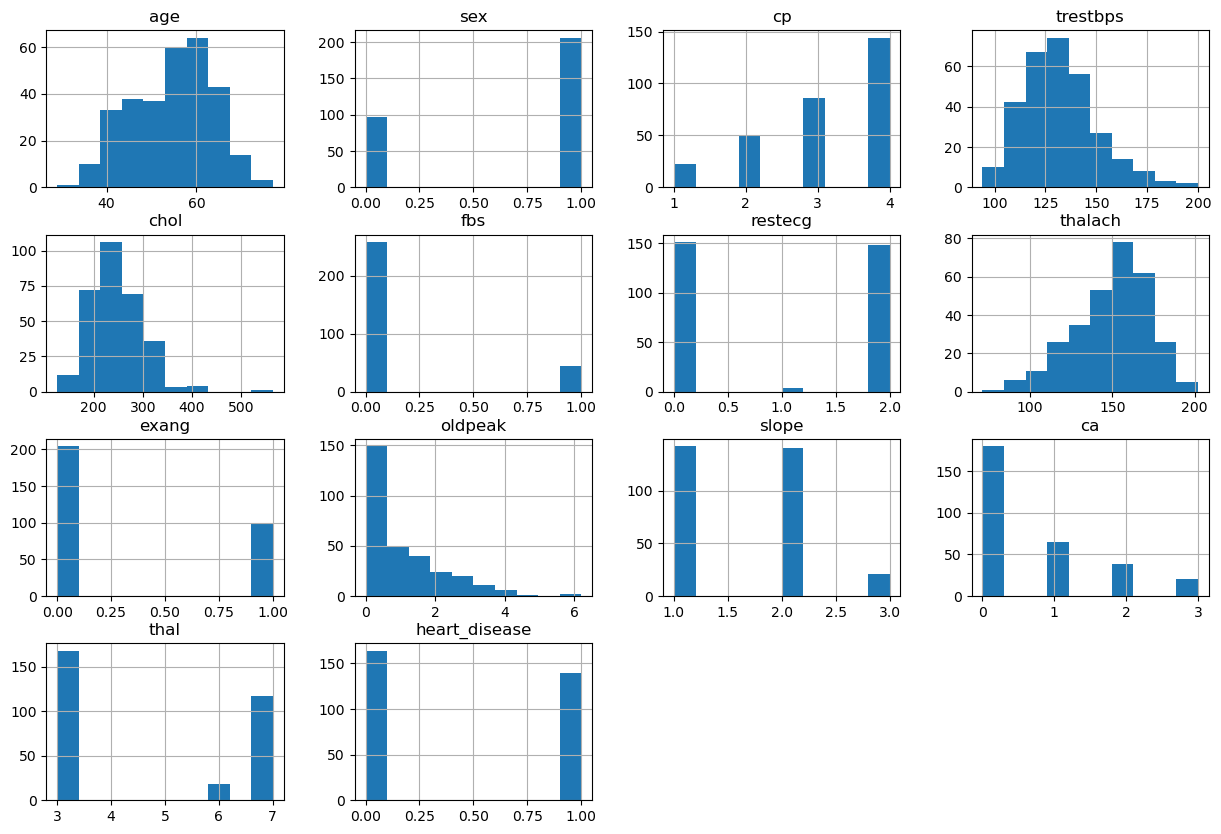

In [18]:
# Visualizing the distributions using histogram
heart_data.hist(figsize=(15,10));

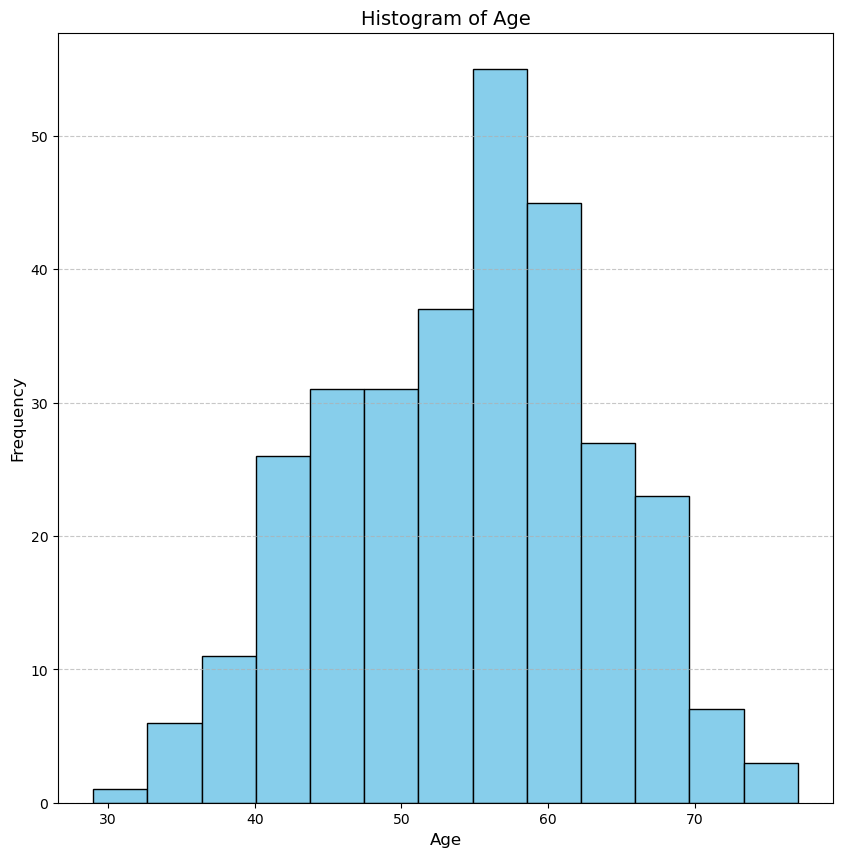

In [19]:
# Distribution of Age (Histogram)
plt.figure(figsize=(10, 10))
plt.hist(heart_data["age"], bins='auto', color='skyblue', edgecolor='black')
plt.title('Histogram of Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

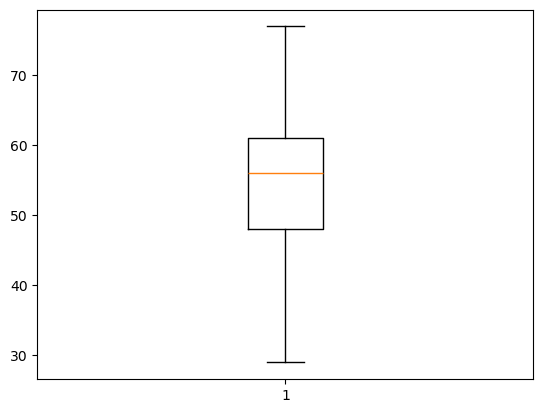

In [20]:
# Distribution of age (boxplot)
plt.boxplot(heart_data["age"])
plt.show()

#### Age Analysis
The distribution shows most of the individuals are in the range of 40 to 70 years

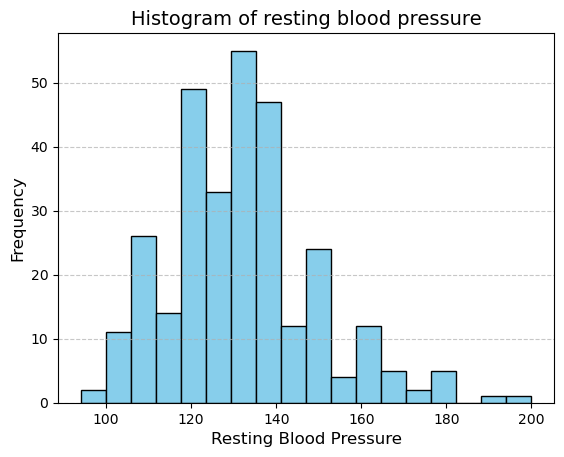

In [22]:
# Distribution of trestbps (Histogram)
plt.hist(heart_data["trestbps"],  bins='auto', color='skyblue', edgecolor='black')
plt.title('Histogram of resting blood pressure', fontsize=14)
plt.xlabel('Resting Blood Pressure', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

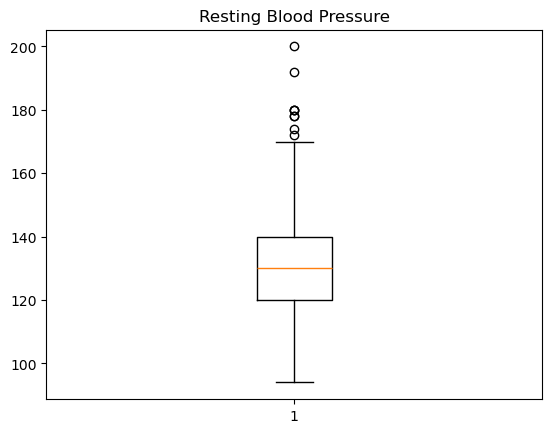

In [23]:
# Distribution of resting blood pressure (boxplot)
plt.boxplot(heart_data["trestbps"])
plt.title("Resting Blood Pressure")
plt.show()

#### Resting Blood Pressure (tresbps) Analysis
The resting blood pressure is centered around 130 mmHg, with some higher values indicating possible hypertension cases. There were some outliers

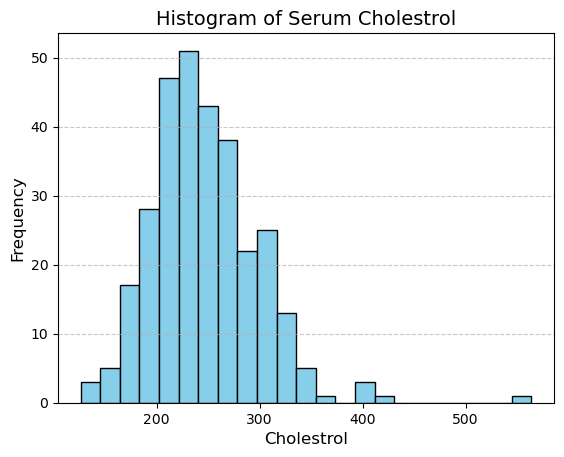

In [25]:
# Distribution of cholestrol (Histogram)
plt.hist(heart_data["chol"], bins='auto', color='skyblue', edgecolor='black' )
plt.title('Histogram of Serum Cholestrol', fontsize=14)
plt.xlabel('Cholestrol', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

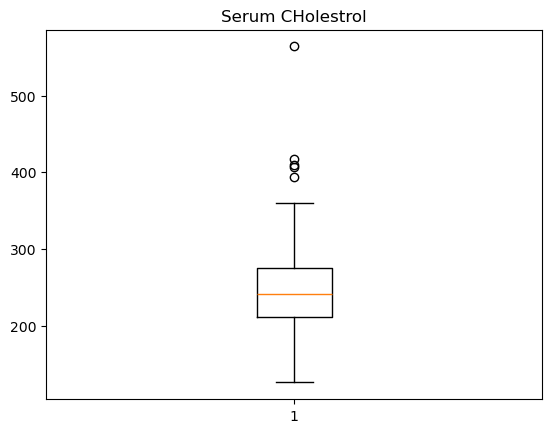

In [26]:
# Distribution of chol (boxplot)
plt.boxplot(heart_data["chol"])
plt.title("Serum CHolestrol")
plt.show()

#### Cholestrol (chol) Analysis
The distribution is rightly-skewed with a peak around 200 mg/dL
There were some significant outliers indicating individuals with very high cholestrol levels

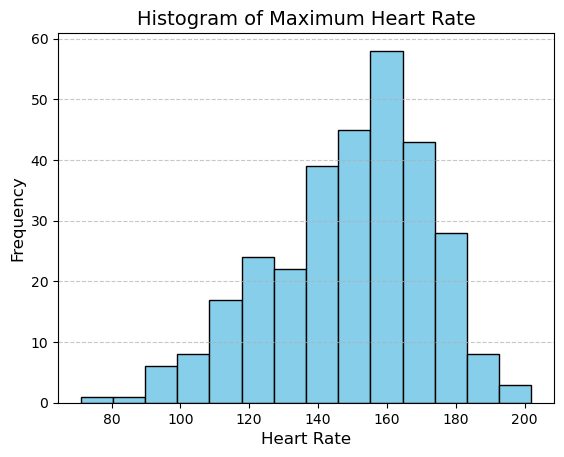

In [28]:
# Distribution of Maximum Heart Rate (Histogram)
plt.hist(heart_data["thalach"], bins='auto', color='skyblue', edgecolor='black' )
plt.title('Histogram of Maximum Heart Rate', fontsize=14)
plt.xlabel('Heart Rate', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

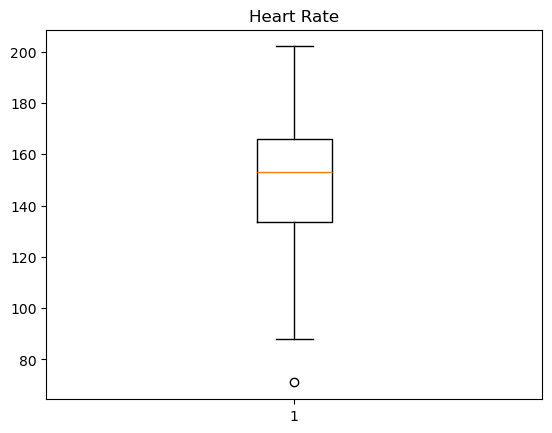

In [29]:
# Distribution of Maximum Heart Rate (boxplot)
plt.boxplot(heart_data["thalach"])
plt.title("Heart Rate")
plt.show()

#### Maximum Heart Rate (thalach) Analysis
The distribution peaks around 150 bpm and has a slightly left-skewed shape. There are few ouliers which are have low values

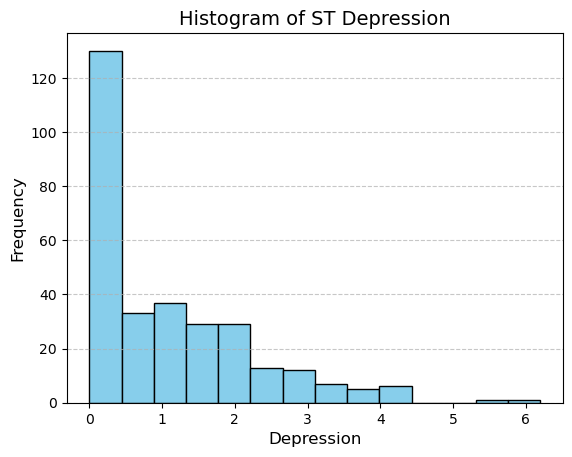

In [31]:
# Distribution of ST Depression (oldpeak)
plt.hist(heart_data["oldpeak"], bins='auto', color='skyblue', edgecolor='black' )
plt.title('Histogram of ST Depression', fontsize=14)
plt.xlabel('Depression', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

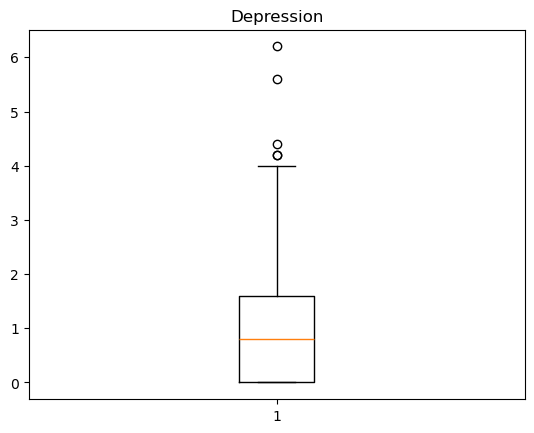

In [32]:
# Distribution of ST Depression (boxplot)
plt.boxplot(heart_data["oldpeak"])
plt.title("Depression")
plt.show()

#### ST Depression (oldpeak) Analysis
Distribution is concentrated at lower values, with a few higher values indicating significant depression due to exercise.

#### Analysing Categorical Variables


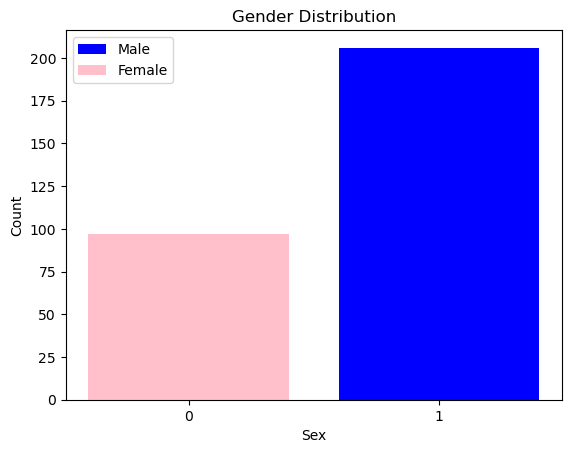

In [35]:
# Bar Chart of Sex
sex_count = heart_data["sex"].value_counts()
fig, sex_graph = plt.subplots()
bars = sex_graph.bar(sex_count.index, sex_count.values, color=["blue", "pink"])
sex_graph.set_xticks([0, 1])
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Gender Distribution")
sex_graph.legend(bars, ["Male", "Female"])
plt.show()

#### Gender (sex) Analysis
The bar chart above clearly indicates that there are more males than females in this dataset. The males are about 200 and the females are about 100.

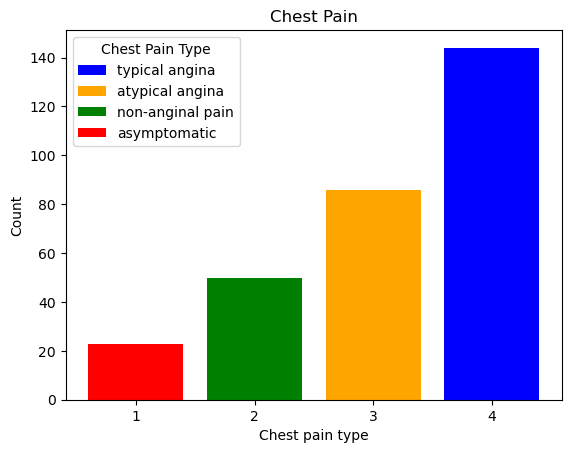

In [37]:
# Bar Chart of Chest Pain (cp)
cp_count = heart_data["cp"].value_counts()
fig, cp_graph = plt.subplots()
bars = cp_graph.bar(cp_count.index, cp_count.values, color=["blue", "orange", "green", "red"])
cp_graph.set_xticks([1, 2, 3, 4])
plt.xlabel("Chest pain type")
plt.ylabel("Count")
plt.title("Chest Pain")
cp_graph.legend(bars, ["typical angina", "atypical angina", "non-anginal pain", "asymptomatic"], title="Chest Pain Type")
plt.show()

#### Chest Pain (cp) analysis

The bar chart indicates that, the most dominant chest pain type is the typical angina. About 140 individuals have this type of chest pain. About 80 people have the atypical angina chest pain. A very few experience the asymptomatic chest pain type and about 45 individuals have the non_anginal chest pain

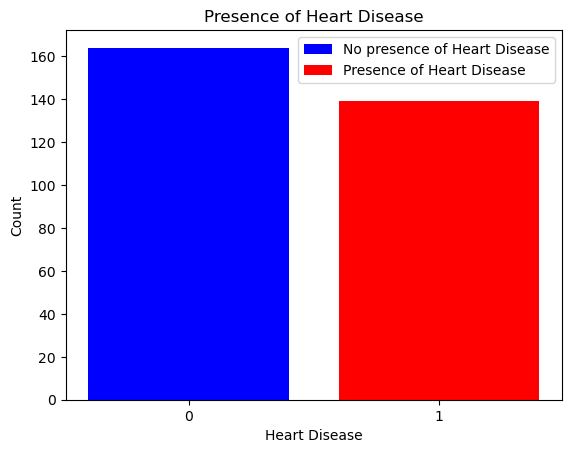

In [53]:
# Bar Chart of Heart Disease
heart_disease_count = heart_data["heart_disease"].value_counts()
fig, heart_disease_graph = plt.subplots()
bars = heart_disease_graph.bar(heart_disease_count.index, heart_disease_count.values, color=["blue", "red"])
heart_disease_graph.set_xticks(heart_disease_count.index)
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.title("Presence of Heart Disease")
heart_disease_graph.legend(bars, ["No presence of Heart Disease", "Presence of Heart Disease"])
plt.show()

#### Heart Disease Analysis
The bar chat indicates that about 160 individuals do not have a heart disease and about 140 individuals have heart disease

## Bivariate Analysis

### Numerical - Numerical Relationship: Relationship between Age and Resting Blood Pressure (trestbps)

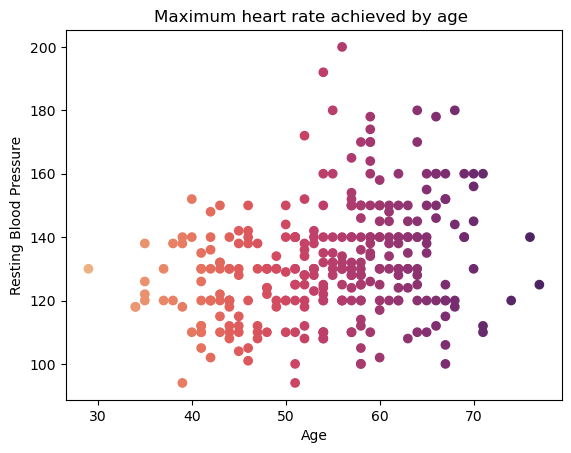

In [64]:
# Scatterplot to explore relationship between Age and trestbps
plt.scatter(heart_data['age'],
            heart_data['trestbps'],
            marker="o",
            c=heart_data['age'],
            cmap='flare')
plt.xlabel("Age")
plt.ylabel("Resting Blood Pressure")
plt.title("Resting Blood Pressure by Age ")
plt.show()

### Age to Resting blood pressure analysis
There seems to be a general trend where maximum heart rate tends to decrease with age. As age increases, the maximum heart rate typically lowers.The color gradient indicates resting blood pressure, with lighter colors likely representing lower blood pressure and darker colors indicating higher blood pressure. The distribution of points suggests that there are more observations in certain age ranges, particularly around the mid-50s to early 60s.

### Relationship between Age and Maximum Heart Rate Achieved (thalach)

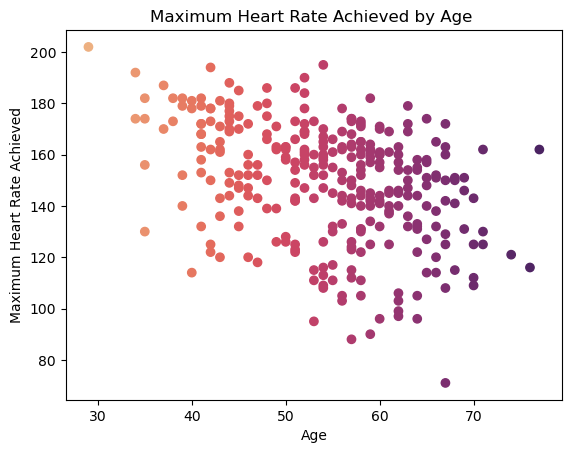

In [68]:
# Scatterplot to explore relationship Age and thalach
plt.scatter(heart_data['age'],
            heart_data['thalach'],
            marker="o",
            c=heart_data['age'],
            cmap='flare')
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate Achieved")
plt.title("Maximum Heart Rate Achieved by Age ")
plt.show()

### Age to Maximum Heart Rate Achieved Analysis
From the graph, it is noticeable that older individuals tend to have lower maximum heart rates. There is a concentration of data points around the ages of 40 to 60, with fewer points as age progresses beyond 70. This may indicate a greater number of observations in middle-aged individuals compared to older adults.

### The Correlation Matrix

In [74]:
# Correlation matrix
heart_data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.365323,0.128303,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.086048,0.380581,0.276816
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233117,0.262089,0.414446
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097528,0.134424,0.150825
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.123726,0.018351,0.085164
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.140764,0.064625,0.025264
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.131749,0.024325,0.169202
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.265699,-0.274142,-0.417167
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145788,0.325240,0.431894
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.301067,0.342405,0.424510


### Analysis from the correlation Matrix

1) Age and Heart Disease: There is a positive correlation (0.225) between age and heart disease. This suggests that as individuals age, the likelihood of heart disease increases.
2Cholesterol (chol) and Heart Disease: The correlation coefficient with heart disease is also positive (0.223). Higher cholesterol levels are associated with a greater risk of heart disease.
Maximum Heart Rate (thalach): This variable shows a negative correlation (-0.419) with heart disease, indicating that higher maximum heart rates are associated with a lower risk of heart disease.
Resting Blood Pressure (trestbps): The correlation with heart disease is weak (0.144), suggesting that resting blood pressure may not be as significant a factor in predicting heart disease risk compared to age or cholesterol.
Sex: The correlation with heart disease is minimal (0.040), indicating that sex may not have a strong direct correlation with heart disease in this dataset.
Exercise (exang): There is a positive correlation (0.150) with heart disease, suggesting that individuals who experience exercise-induced angina may have a higher risk.
Other Variables: Other metrics, such as chest pain type (cp) and slope of the peak exercise ST segment (slope), show varying degrees of correlation but do not exhibit strong patterns compared to age, cholesterol, and maximum heart rate.